# Prediciting Risk Of Smoking, Alcohol And Drug Use Among Adolscents 

### Step1- Importing libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step2-Loading data


In [2]:
pupil = pd.read_csv("C:/Users/Syam7/OneDrive/My project/Final Data/9366_sdd_pupil_data_archive_2023.csv", low_memory=False)
teacher = pd.read_csv("C:/Users/Syam7/OneDrive/My project/Final Data/9366_sdd_teacher_data_archive_2023.csv", low_memory=False)
imd = pd.read_csv("C:/Users/Syam7/OneDrive/My project/Final Data/imd.csv", low_memory=False)

print("Datasets loaded successfully:")
print(f"Pupil shape   → {pupil.shape}")
print(f"Teacher shape → {teacher.shape}")
print(f"IMD shape     → {imd.shape}")

# Quick look at top rows
display(pupil.head(3))
display(teacher.head(3))
display(imd.head(3))


Datasets loaded successfully:
Pupil shape   → (17466, 657)
Teacher shape → (89, 64)
IMD shape     → (32844, 57)


,pseudo_pupilid,datayr,dgender,age1115,region,ethnicgp5,pupilwt,al4warg,al4wdam,al4wdedr,...,okdk1,okdkw,okec1,okecw,okvs1,okvsw,ownbed,returncode,truant,volunsch
0,6e52af795e432924ff13e1c8e1fa32059a193afc5490dc...,2023,2,13,8,1,1.284952,-1,-1,-1,...,2,2,2,2,2,2,1,9,2,0
1,9f6dd1020163cedca88636dbf4b11ab144ffbb0363d5d8...,2023,1,12,8,1,3.303929,-1,-1,-1,...,2,2,2,2,2,2,1,9,2,0
2,dbf2e4ff33424f6bf3810eacdc1e0200d96c6104434eb5...,2023,1,13,8,1,3.303929,-1,-1,-1,...,2,2,2,2,2,2,1,9,2,0


,pseudo_schoolid,edadvice,lesalc,lesdrg,lesnps,lessmok,lesvap,q10advic,q10assem,q10coun,...,y7smok,y7vap,y8alc,y8drg,y8smok,y8vap,y9alc,y9drg,y9smok,y9vap
0,f1bd51429c4e05eec690236a16e8abf76881841d79bb70...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
1,8db79621473ff369cccc9af1d40867e016ea7179398d6a...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,f3922cb2fa7d25311c31fc04588bffe9b33c6580254637...,2.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,0.0,...,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0


,LSOA code (2011),LSOA name (2011),Local Authority District code (2019),Local Authority District name (2019),Index of Multiple Deprivation (IMD) Score,Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived),Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs),Income Score (rate),Income Rank (where 1 is most deprived),Income Decile (where 1 is most deprived 10% of LSOAs),...,Indoors Sub-domain Rank (where 1 is most deprived),Indoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Outdoors Sub-domain Score,Outdoors Sub-domain Rank (where 1 is most deprived),Outdoors Sub-domain Decile (where 1 is most deprived 10% of LSOAs),Total population: mid 2015 (excluding prisoners),Dependent Children aged 0-15: mid 2015 (excluding prisoners),Population aged 16-59: mid 2015 (excluding prisoners),Older population aged 60 and over: mid 2015 (excluding prisoners),Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners)
0,E01000001,City of London 001A,E09000001,City of London,6.208,29199,9,0.007,32831,10,...,16364,5,1.503,1615,1,1296,175,656,465,715
1,E01000002,City of London 001B,E09000001,City of London,5.143,30379,10,0.034,29901,10,...,22676,7,1.196,2969,1,1156,182,580,394,620
2,E01000003,City of London 001C,E09000001,City of London,19.402,14915,5,0.086,18510,6,...,17318,6,2.207,162,1,1350,146,759,445,804


### Step3 - Cleaning and standardisation of pupil & Imd data


In [15]:
# For PUPIL data
pupil.columns = pupil.columns.str.strip()

# Useful numeric coercions
if "datayr" in pupil.columns:
    pupil["datayr"] = pd.to_numeric(pupil["datayr"], errors="coerce")

beh_cols = [c for c in ("lssmk", "lsalc", "lsdrg") if c in pupil.columns]
for c in beh_cols:
    pupil[c] = pd.to_numeric(pupil[c], errors="coerce")
# Keep only 1 (Yes) or 2 (No), set all others to NaN
    pupil.loc[~pupil[c].isin([1, 2]), c] = np.nan
    
# Drop rows where behaviour is missing (NaN)
    pupil = pupil.dropna(subset=[c])
    
# Recode: 1 = Yes → 1, 2 = No → 0
    pupil[c] = pupil[c].map({1: 1, 2: 0})

# Renaming behavioural columns to human-readable labels
rename_behaviour_cols = {
    "lssmk": "Smoking",
    "lsalc": "Alcohol",
    "lsdrg": "Drugs"
}

# Only rename if those columns exist
pupil.rename(columns=rename_behaviour_cols, inplace=True)

# Update behaviour column list for later steps
beh_cols = [c for c in ["Smoking", "Alcohol", "Drugs"] if c in pupil.columns]

# Keep only essentials (age cleaned later in Step 4)
keep_pupil = [c for c in ("pseudo_pupilid", "datayr", "age1115") if c in pupil.columns] + beh_cols
pupil_clean = pupil[keep_pupil].copy()
print("pupil_clean:", pupil_clean.shape)

## For imd data ----
imd.columns = imd.columns.str.strip()
imd.rename(columns={
    "Index of Multiple Deprivation (IMD) Score": "imd_score",
    "Index of Multiple Deprivation (IMD) Rank (where 1 is most deprived)": "imd_rank",
    "Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)": "imd_decile",
    "LSOA code (2011)": "lsoa_code",
    "LSOA name (2011)": "lsoa_name",
    "Local Authority District code (2019)": "lad_code",
    "Local Authority District name (2019)": "lad_name",
}, inplace=True)

for c in ("imd_score", "imd_rank", "imd_decile"):
    if c in imd.columns:
        imd[c] = pd.to_numeric(imd[c], errors="coerce")

imd_clean = imd.dropna(subset=["imd_score"]).copy()
if "imd_decile" in imd_clean.columns:
    imd_clean.loc[~imd_clean["imd_decile"].between(1, 10), "imd_decile"] = np.nan

print("imd_clean:", imd_clean.shape)

pupil_clean: (14836, 6)
imd_clean: (32844, 57)


### Step4-Detecting and cleaning Age/gender columns


In [4]:
# cleaning Age -- Only keeping Age 11 - 15
src_age = "age1115" if "age1115" in pupil.columns else ("age1115" if "age1115" in pupil_clean.columns else None)
if src_age:
    pupil["age_clean"] = pd.to_numeric(pupil[src_age], errors="coerce")
    pupil.loc[~pupil["age_clean"].between(11, 15), "age_clean"] = np.nan
else:
    print(" age1115 not found; skipping age cleaning.")
  
# cleaning  Gender
gender_map = {1: "Male", 2: "Female", 3: "Other / Non-binary", 4: "Other / Non-binary", 5: "Prefer not to say"}
src_gender = "dgender" if "dgender" in pupil.columns else None
if src_gender:
    pupil["gender_label"] = pupil[src_gender].map(gender_map).fillna("Unknown")
else:
    print(" .gender not found; skipping gender mapping.")

# Refresh pupil_basic with new fields
beh_cols = [c for c in (["Smoking", "Alcohol", "Drugs"]) if c in pupil.columns]  
keep_pupil = [c for c in ("pseudo_pupilid", "datayr", "age_clean", "gender_label") if c in pupil.columns] + beh_cols
pupil_clean = pupil[keep_pupil].copy()

print("pupil_clean (after Step 4):", pupil_clean.shape)

pupil_clean (after Step 4): (14836, 7)


### Step5 --Region codes to 'region name' in pupil dataset

In [5]:
if "region" in pupil.columns:
    region_map = {
        1: "North East",
        2: "North West",
        3: "Yorkshire and The Humber",
        4: "East Midlands",
        5: "West Midlands",
        6: "East of England",
        7: "London",
        8: "South East",
        9: "South West"
    }

    # Creating readable region_name column
    pupil["region_name"] = pupil["region"].map(region_map).fillna("Unknown")

    # Refresh pupil_clean to include the new field
    keep_cols = [c for c in pupil_clean.columns] + ["region_name"]
    pupil_clean = pupil[keep_cols].copy()

    print("Region codes mapped successfully.")
    print(pupil["region_name"].value_counts(dropna=False))
else:
    print("No 'region' column found in pupil data — skipping region mapping.")

Region codes mapped successfully.
region_name
North West                  3108
South East                  1927
London                      1849
North East                  1703
Yorkshire and The Humber    1655
East of England             1463
West Midlands               1113
South West                  1032
East Midlands                986
Name: count, dtype: int64


### Step6 -- Creating Region in Imd and merging with Pupil Dataset

In [6]:
  # creating region with lad names
     
lad2region = pd.DataFrame({
    "lad_name": [
        "County Durham", "Manchester", "Leeds", "Nottingham",
        "Birmingham", "Cambridge", "London Borough of Camden",
        "Kent", "Bristol, City of", "Cornwall"
    ],
    "region_name": [
        "North East", "North West", "Yorkshire and The Humber", "East Midlands",
        "West Midlands", "East of England", "London",
        "South East", "South West", "South West"
    ]
})

lad2region.to_csv("lad_to_region_lookup.csv", index=False)
print("Created lad_to_region_lookup.csv")

# Merging lad2region in imd dataset
imd_clean = imd_clean.merge(lad2region, on="lad_name", how="left")

# Verify that region_name column is now attached
print("\nAfter merge — IMD columns:", imd_clean.columns.tolist())
print(imd_clean[["lad_name", "region_name"]].head(10))
print("\nUnique regions now present in IMD data:")
print(imd_clean["region_name"].value_counts(dropna=False))

Created lad_to_region_lookup.csv

After merge — IMD columns: ['lsoa_code', 'lsoa_name', 'lad_code', 'lad_name', 'imd_score', 'imd_rank', 'imd_decile', 'Income Score (rate)', 'Income Rank (where 1 is most deprived)', 'Income Decile (where 1 is most deprived 10% of LSOAs)', 'Employment Score (rate)', 'Employment Rank (where 1 is most deprived)', 'Employment Decile (where 1 is most deprived 10% of LSOAs)', 'Education, Skills and Training Score', 'Education, Skills and Training Rank (where 1 is most deprived)', 'Education, Skills and Training Decile (where 1 is most deprived 10% of LSOAs)', 'Health Deprivation and Disability Score', 'Health Deprivation and Disability Rank (where 1 is most deprived)', 'Health Deprivation and Disability Decile (where 1 is most deprived 10% of LSOAs)', 'Crime Score', 'Crime Rank (where 1 is most deprived)', 'Crime Decile (where 1 is most deprived 10% of LSOAs)', 'Barriers to Housing and Services Score', 'Barriers to Housing and Services Rank (where 1 is most 

##### Normalising LAD Names and Inferring Missing Regions (London & South East)”

In [16]:
# --- Normalise LAD names on BOTH sides ---
def norm_lad(s: pd.Series) -> pd.Series:
    s = s.astype(str).str.strip()
    # remove common prefixes
    s = s.str.replace(r"^(London Borough of|Royal Borough of|City of|Borough of)\s+", "", regex=True)
    # standard tidy-ups
    s = s.str.replace(r"\s+", " ", regex=True)
    return s.str.lower()

# Add normalised join keys
imd_clean["lad_name_norm"] = norm_lad(imd_clean["lad_name"])
lad2region["lad_name_norm"] = norm_lad(lad2region["lad_name"])

# Re-merge using the normalised key (drop any stale region_name first)
imd_clean = imd_clean.drop(columns=["region_name"], errors="ignore")
imd_clean = imd_clean.merge(
    lad2region[["lad_name_norm", "region_name"]].drop_duplicates(),
    on="lad_name_norm", how="left"
)

# 33 London boroughs + City of London (normalised forms)
london_boroughs = {
    "barnet","barking and dagenham","bexley","brent","bromley","camden","croydon","ealing",
    "enfield","greenwich","hackney","hammersmith and fulham","haringey","harrow","havering",
    "hillingdon","hounslow","islington","kensington and chelsea","kingston upon thames",
    "lambeth","lewisham","merton","newham","redbridge","richmond upon thames","southwark",
    "sutton","tower hamlets","waltham forest","wandsworth","westminster","city of london"
}

# Common South East LAD names (unitaries/districts/counties – not exhaustive but broad)
south_east_lads = {
    # Unitaries
    "brighton and hove","medway","portsmouth","southampton","isle of wight","milton keynes",
    "bracknell forest","reading","slough","west berkshire","windsor and maidenhead","wokingham",
    # Counties/districts coverage
    "kent","ashford","canterbury","dartford","dover","folkestone and hythe","gravesham","maidstone",
    "sevenoaks","swale","thanet","tonbridge and malling","tunbridge wells",
    "surrey","elmbridge","epsom and ewell","guildford","mole valley","reigate and banstead","runnymede",
    "spelthorne","surrey heath","tandridge","waverley","woking",
    "east sussex","lewes","wealden","rother","hastings","eastbourne",
    "west sussex","arun","ching?","chichester","crawley","horsham","mid sussex","worthing","adur",
    "oxfordshire","oxford","cherwell","south oxfordshire","vale of white horse","west oxfordshire",
    "buckinghamshire","aylesbury vale","chiltern","south bucks","wycombe","buckinghamshire",
    "hampshire","basingstoke and deane","east hampshire","eastleigh","fareham","gosport","hart",
    "havant","new forest","rushmoor","test valley","winchester",
}

# Infer London where missing and LAD is a London borough
mask_na = imd_clean["region_name"].isna()
mask_london = imd_clean["lad_name_norm"].isin(london_boroughs)
imd_clean.loc[mask_na & mask_london, "region_name"] = "London"

# Infer South East where missing and LAD in list above
mask_se = imd_clean["lad_name_norm"].isin(south_east_lads)
imd_clean.loc[mask_na & mask_se, "region_name"] = "South East"

# Re-check coverage
print("Regions present after normalised merge + inference:")
print(sorted(imd_clean["region_name"].dropna().unique()))

Regions present after normalised merge + inference:
['East Midlands', 'East of England', 'London', 'North East', 'North West', 'South East', 'South West', 'West Midlands', 'Yorkshire and The Humber']


#### Step6a--Aggregating imd and merging imd with pupil data

In [8]:
#  Aggregate IMD metrics by region
imd_region_summary = (
    imd_clean
     .dropna(subset=["region_name"])         
    .groupby("region_name", dropna=False)
    .agg(
        mean_imd_score=("imd_score", "mean"),
        mean_imd_rank=("imd_rank", "mean"),
        share_decile_1=("imd_decile", lambda s: np.mean(s == 1)),
        share_decile_1_2=("imd_decile", lambda s: np.mean(s.isin([1, 2])))
    )
    .reset_index()
)
print("Regional IMD summary created:")
display(imd_region_summary.head(10))

Regional IMD summary created:


,region_name,mean_imd_score,mean_imd_rank,share_decile_1,share_decile_1_2
0,East Midlands,35.731313,8024.010989,0.307692,0.571429
1,East of England,15.434217,19797.173913,0.000000,0.043478
2,London,21.506741,15191.219093,0.022158,0.164630
3,North East,27.434944,12317.799383,0.120370,0.333333
4,North West,39.987039,6598.627660,0.432624,0.592199
5,South East,15.477432,20548.747306,0.030658,0.082869
6,South West,24.626939,13421.735144,0.098472,0.207131
7,West Midlands,37.608263,7752.449139,0.413146,0.563380
8,Yorkshire and The Humber,27.243361,14058.024896,0.236515,0.336100


#### Step6b--Merging with Pupil and saving

In [9]:
if "region_name" not in pupil_clean.columns:
    raise KeyError("pupil_clean has no 'region_name'. Run Step 5 first.")

pupil_merged = pupil_clean.merge(imd_region_summary, on="region_name", how="left")
print("\n Merged dataset shape:", pupil_merged.shape)
display(pupil_merged.head(5))

# Save merged dataset ---
pupil_merged.to_csv("pupil_with_regional_imd.csv", index=False)
print(" Saved merged dataset → pupil_with_regional_imd.csv")


 Merged dataset shape: (14836, 12)


,pseudo_pupilid,datayr,age_clean,gender_label,Smoking,Alcohol,Drugs,region_name,mean_imd_score,mean_imd_rank,share_decile_1,share_decile_1_2
0,6e52af795e432924ff13e1c8e1fa32059a193afc5490dc...,2023,13.0,Female,1,1,1,South East,15.477432,20548.747306,0.030658,0.082869
1,9f6dd1020163cedca88636dbf4b11ab144ffbb0363d5d8...,2023,12.0,Male,0,0,0,South East,15.477432,20548.747306,0.030658,0.082869
2,dbf2e4ff33424f6bf3810eacdc1e0200d96c6104434eb5...,2023,13.0,Male,1,1,1,South East,15.477432,20548.747306,0.030658,0.082869
3,85add65bb9fbdfb0490cb1470bf05e1ee090bd3fc8fc22...,2023,15.0,Male,0,0,1,South East,15.477432,20548.747306,0.030658,0.082869
4,1980f836680a33d00f4990fa10bfd481b3e912c0566c4d...,2023,15.0,Male,1,1,1,South East,15.477432,20548.747306,0.030658,0.082869


 Saved merged dataset → pupil_with_regional_imd.csv


### Step7 -- EDA 

##### 7A DEMOGRAPHIC DISTRIBUTIONS

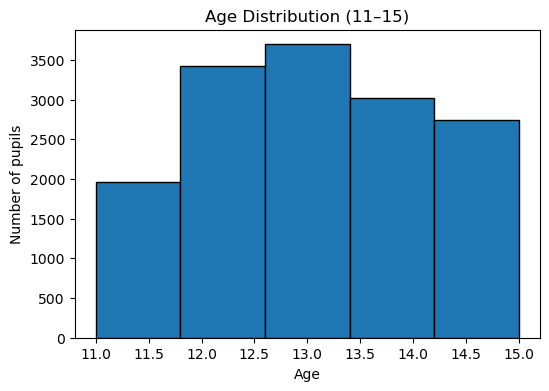

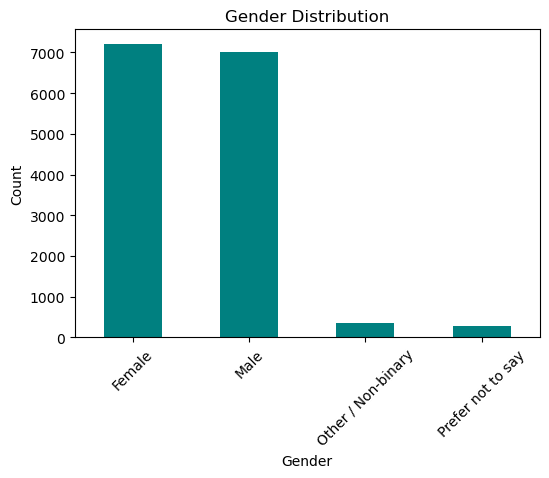

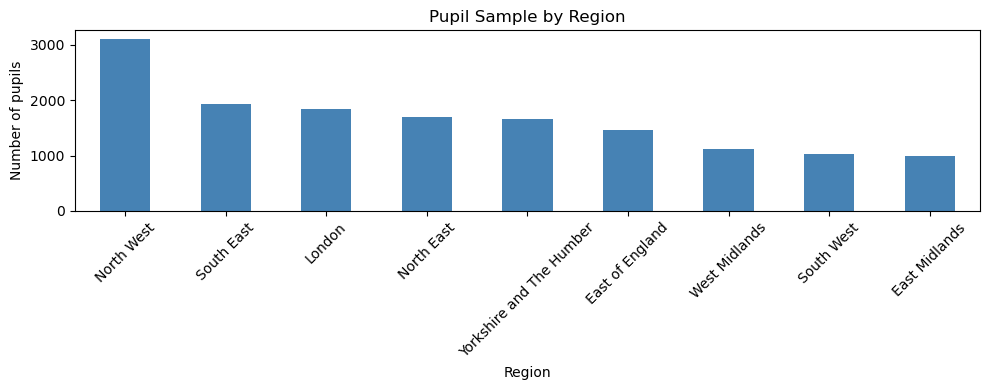

In [10]:
# --- Age ---
plt.figure(figsize=(6,4))
pupil_merged["age_clean"].dropna().plot(kind="hist", bins=5, edgecolor="black")
plt.title("Age Distribution (11–15)")
plt.xlabel("Age")
plt.ylabel("Number of pupils")
plt.show()

# --- Gender ---
plt.figure(figsize=(6,4))
pupil_merged["gender_label"].value_counts().plot(kind="bar", color="teal", rot=45)
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# --- Region sample size ---
plt.figure(figsize=(10,4))
pupil_merged["region_name"].value_counts().plot(kind="bar", color="steelblue", rot=45)
plt.title("Pupil Sample by Region")
plt.xlabel("Region")
plt.ylabel("Number of pupils")
plt.tight_layout()
plt.show()

##### 7B BEHAVIOUR PREVALENCE


Overall behaviour prevalence (share of '1's):


Smoking    0.675384
Alcohol    0.657859
Drugs      0.684753
dtype: float64

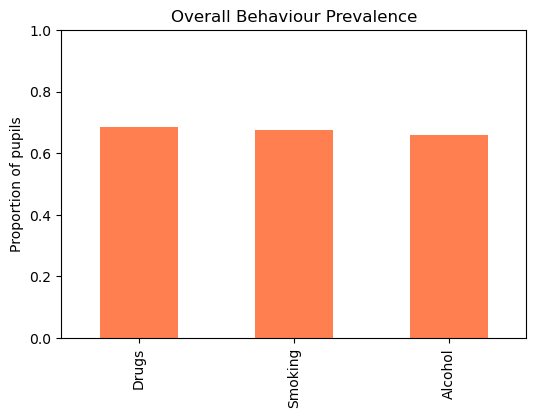


Behaviour prevalence by gender:


,Smoking,Alcohol,Drugs
gender_label,,,
Female,0.693866,0.668748,0.696642
Male,0.658533,0.648830,0.673516
Other / Non-binary,0.631884,0.640580,0.666667
Prefer not to say,0.675090,0.624549,0.682310


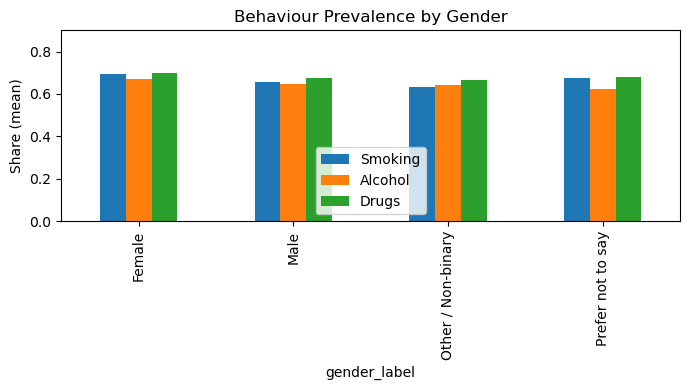

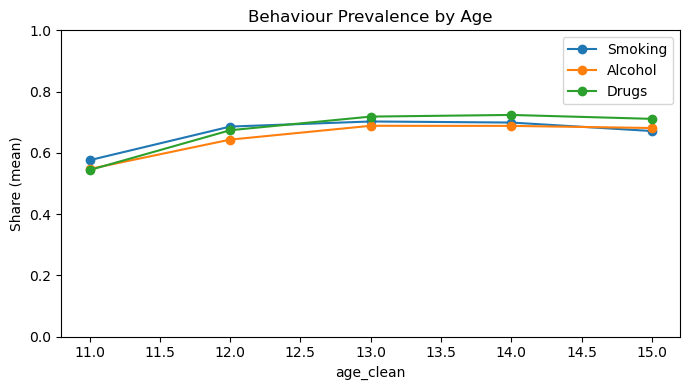

In [11]:
beh_cols = [c for c in ["Smoking", "Alcohol", "Drugs"] if c in pupil_merged.columns]

# --- Overall prevalence ---
prev_overall = pupil_merged[beh_cols].mean()
print("\nOverall behaviour prevalence (share of '1's):")
display(prev_overall)

plt.figure(figsize=(6,4))
prev_overall.sort_values(ascending=False).plot(kind="bar", color="coral")
plt.title("Overall Behaviour Prevalence")
plt.ylabel("Proportion of pupils")
plt.ylim(0,1)
plt.show()

# --- By gender ---
if "gender_label" in pupil_merged:
    prev_gender = pupil_merged.groupby("gender_label")[beh_cols].mean()
    print("\nBehaviour prevalence by gender:")
    display(prev_gender)

    prev_gender.plot(kind="bar", figsize=(7,4))
    plt.title("Behaviour Prevalence by Gender")
    plt.ylabel("Share (mean)")
    plt.ylim(0,0.90)
    plt.tight_layout()
    plt.show()

# --- By age ---
prev_age = pupil_merged.groupby("age_clean")[beh_cols].mean()
prev_age.plot(marker="o", figsize=(7,4))
plt.title("Behaviour Prevalence by Age")
plt.ylabel("Share (mean)")
plt.ylim(0,1)
plt.tight_layout()
plt.show()

##### 7C REGIONAL COMPARISONS

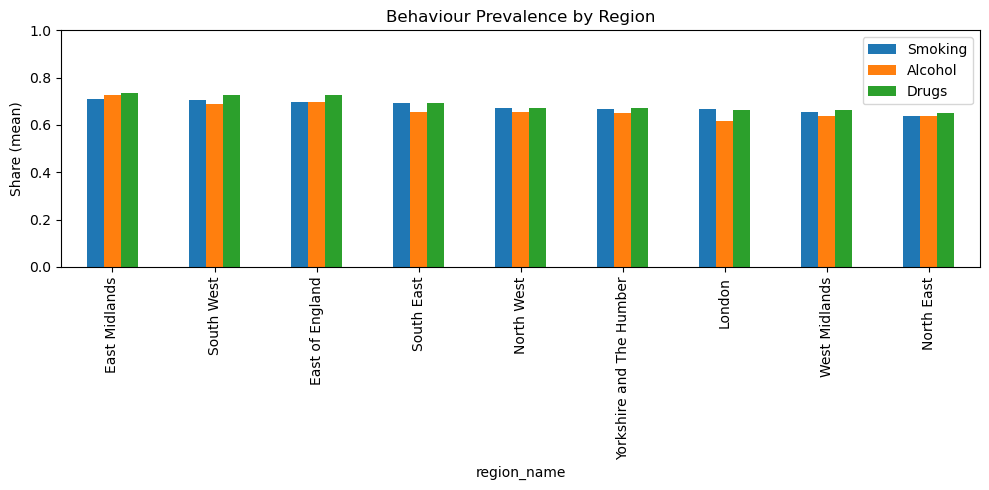

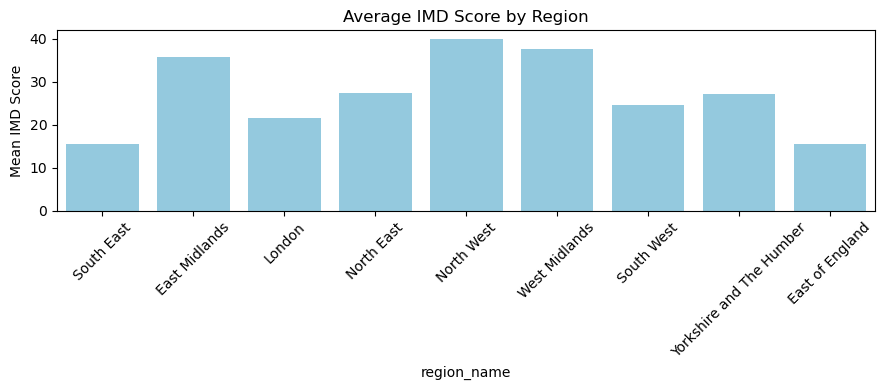

In [12]:
# --- Behaviour prevalence by region ---
prev_region = pupil_merged.groupby("region_name")[beh_cols].mean().sort_values(by="Smoking", ascending=False)
prev_region.plot(kind="bar", figsize=(10,5))
plt.title("Behaviour Prevalence by Region")
plt.ylabel("Share (mean)")
plt.ylim(0,1)
plt.tight_layout()
plt.show()

# --- IMD score by region ---
plt.figure(figsize=(9,4))
sns.barplot(data=pupil_merged.drop_duplicates("region_name"),
x="region_name", y="mean_imd_score", color="skyblue")
plt.xticks(rotation=45)
plt.title("Average IMD Score by Region")
plt.ylabel("Mean IMD Score")
plt.tight_layout()
plt.show()

##### 7D RELATIONSHIP:  VS BEHAVIOURS

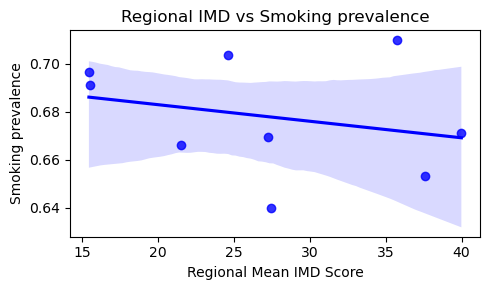

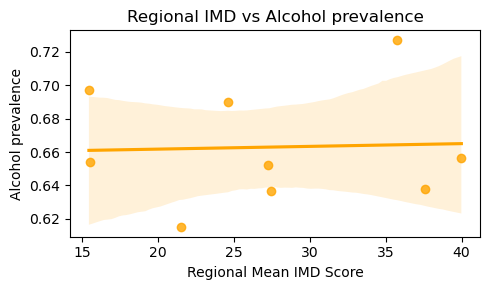

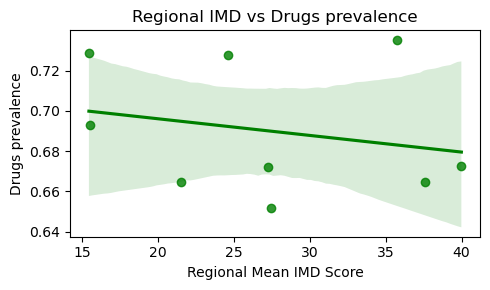

In [17]:
# Aggregate by region
region_means = (
    pupil_merged
    .groupby("region_name")[["mean_imd_score", "Smoking", "Alcohol", "Drugs"]]
    .mean()
    .reset_index()
)

for col, color in zip(["Smoking", "Alcohol", "Drugs"], ["blue", "orange", "green"]):
    plt.figure(figsize=(5,3))
    sns.regplot(data=region_means, x="mean_imd_score", y=col, marker="o", color=color)
    plt.title(f"Regional IMD vs {col} prevalence")
    plt.xlabel("Regional Mean IMD Score")
    plt.ylabel(f"{col} prevalence")
    plt.tight_layout()
    plt.show()

##### 7E CORRELATION HEATMAP

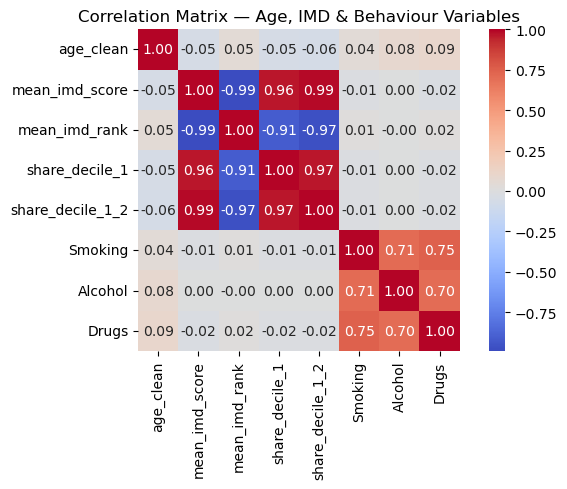

In [14]:
corr_cols = ["age_clean", "mean_imd_score", "mean_imd_rank", "share_decile_1", "share_decile_1_2"] + beh_cols
corr = pupil_merged[corr_cols].corr(numeric_only=True)
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix — Age, IMD & Behaviour Variables")
plt.tight_layout()
plt.show()